   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...

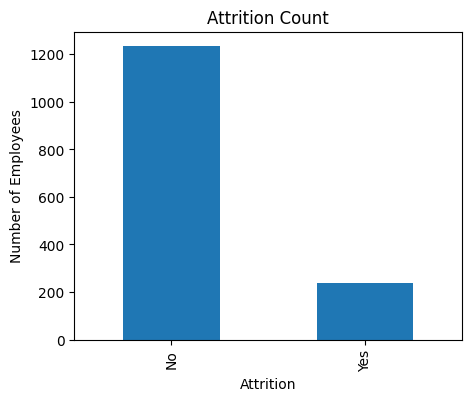

<Figure size 700x500 with 0 Axes>

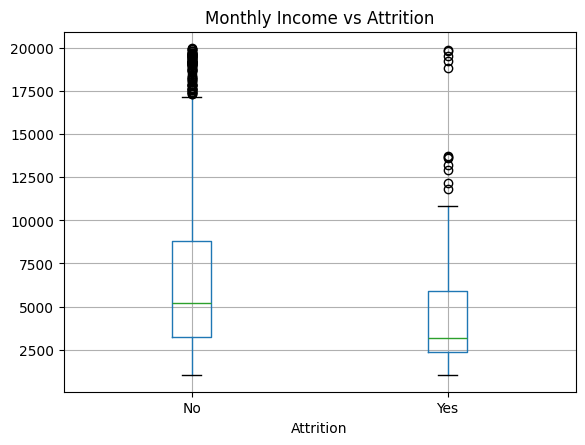

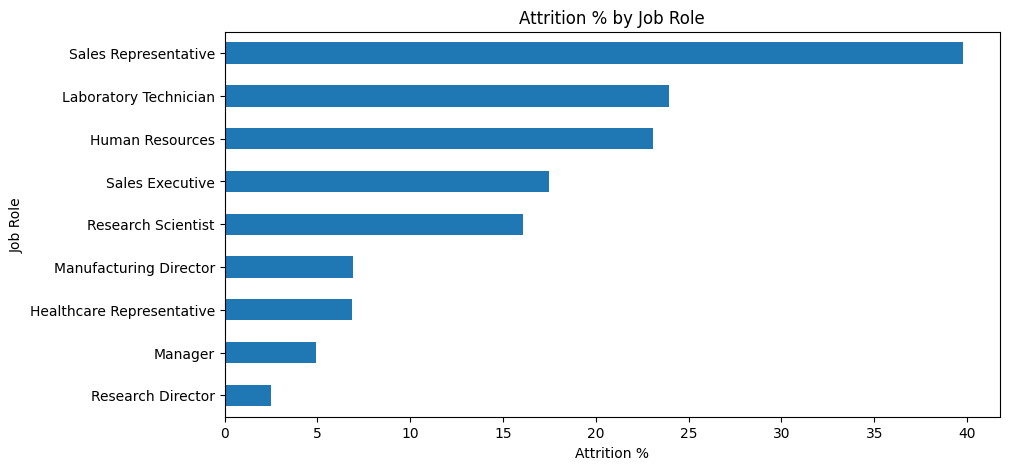

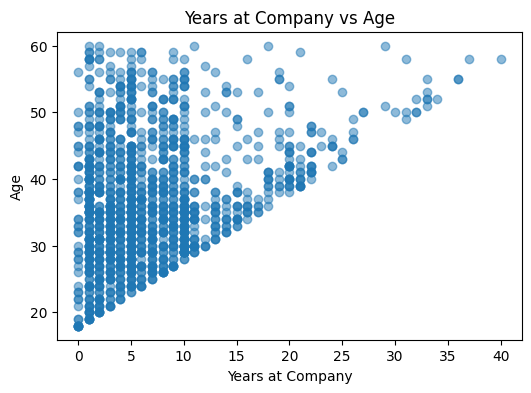

EducationField
Human Resources     25.925926
Life Sciences       14.686469
Marketing           22.012579
Medical             13.577586
Other               13.414634
Technical Degree    24.242424
Name: Attrition_flag, dtype: float64


In [ ]:
# ===============================================================
# 📌 IMPORT LIBRARIES (NUMPY + PANDAS + MATPLOTLIB)
# ===============================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ===============================================================
# 📌 PROBLEM: Load dataset
#    SOLUTION: Use pandas read_csv()
# ===============================================================
df = pd.read_csv("/content/HR.csv")
print(df.head())
print(df.shape)


# ===============================================================
# 📌 PROBLEM: Understand missing values & data types
#    SOLUTION: info() and isnull()
# ===============================================================
print(df.info())
print(df.isnull().sum())


# ===============================================================
# 📌 PROBLEM: Remove columns that don't add value
#    SOLUTION: Drop irrelevant columns
# ===============================================================
to_drop = ["EmployeeCount", "StandardHours", "Over18", "EmployeeNumber"]
df = df.drop(columns=to_drop, errors="ignore")
print(df.head())


# ===============================================================
# 📌 PROBLEM: Convert Yes/No to 1/0
#    SOLUTION: Use map()
# ===============================================================
df["Attrition_flag"] = df["Attrition"].map({"Yes": 1, "No": 0})
print(df["Attrition_flag"].value_counts())


# ===============================================================
# 📌 PROBLEM: Basic statistics (Salary, Age, Experience)
#    SOLUTION: Pandas describe()
# ===============================================================
print(df[["Age","MonthlyIncome","YearsAtCompany"]].describe())


# ===============================================================
# 📌 PROBLEM: Calculate Attrition %
#    SOLUTION: mean() of Attrition_flag
# ===============================================================
attrition_rate = df["Attrition_flag"].mean() * 100
print("Attrition Rate (%): ", round(attrition_rate, 2))


# ===============================================================
# 📌 NUMPY USAGE SECTION
# ===============================================================

# ---------------------------------------------------------------
# 📌 PROBLEM: Find average monthly income using NumPy
#    SOLUTION: Use np.mean()
# ---------------------------------------------------------------
avg_income_np = np.mean(df["MonthlyIncome"])
print("Average Monthly Income (NumPy): ", avg_income_np)

# ---------------------------------------------------------------
# 📌 PROBLEM: Calculate median age using NumPy
#    SOLUTION: Use np.median()
# ---------------------------------------------------------------
median_age_np = np.median(df["Age"])
print("Median Age (NumPy): ", median_age_np)

# ---------------------------------------------------------------
# 📌 PROBLEM: Count employees who stayed vs left using NumPy
#    SOLUTION: np.sum() on binary column
# ---------------------------------------------------------------
left_count = np.sum(df["Attrition_flag"])
stay_count = df.shape[0] - left_count
print("Left:", left_count, " | Stayed:", stay_count)

# ---------------------------------------------------------------
# 📌 PROBLEM: Create NumPy array for normalization of income
#    SOLUTION: (x - min)/(max - min)
# ---------------------------------------------------------------
income = df["MonthlyIncome"].values
norm_income = (income - np.min(income)) / (np.max(income) - np.min(income))
print("Normalized income sample:", norm_income[:5])


# ===============================================================
# 📌 PROBLEM: Attrition by Department
#    SOLUTION: groupby() + mean()
# ===============================================================
attrition_by_dept = df.groupby("Department")["Attrition_flag"].mean() * 100
print(attrition_by_dept)


# ===============================================================
# 📌 PROBLEM: Visualize Attrition Count
#    SOLUTION: bar chart
# ===============================================================
plt.figure(figsize=(5,4))
df["Attrition"].value_counts().plot(kind="bar")
plt.title("Attrition Count")
plt.xlabel("Attrition")
plt.ylabel("Number of Employees")
plt.show()


# ===============================================================
# 📌 PROBLEM: Salary impact on Attrition
#    SOLUTION: Boxplot
# ===============================================================
plt.figure(figsize=(7,5))
df.boxplot(column="MonthlyIncome", by="Attrition")
plt.title("Monthly Income vs Attrition")
plt.suptitle("")
plt.show()


# ===============================================================
# 📌 PROBLEM: Which Job Role has the highest Attrition?
#    SOLUTION: groupby() + mean() + barh
# ===============================================================
job_attrition = df.groupby("JobRole")["Attrition_flag"].mean().sort_values() * 100

plt.figure(figsize=(10,5))
job_attrition.plot(kind="barh")
plt.title("Attrition % by Job Role")
plt.xlabel("Attrition %")
plt.ylabel("Job Role")
plt.show()


# ===============================================================
# 📌 PROBLEM: How Age relates to Experience
#    SOLUTION: Scatter plot
# ===============================================================
plt.figure(figsize=(6,4))
plt.scatter(df["YearsAtCompany"], df["Age"], alpha=0.5)
plt.title("Years at Company vs Age")
plt.xlabel("Years at Company")
plt.ylabel("Age")
plt.show()


# ===============================================================
# 📌 PROBLEM: Attrition by Education Field
#    SOLUTION: groupby() + mean()
# ===============================================================
edu_attrition = df.groupby("EducationField")["Attrition_flag"].mean() * 100
print(edu_attrition)
